ADF Statistic: -7.214074913565803
p-value: 2.1963196715517275e-10


TypeError: float() argument must be a string or a real number, not 'Period'

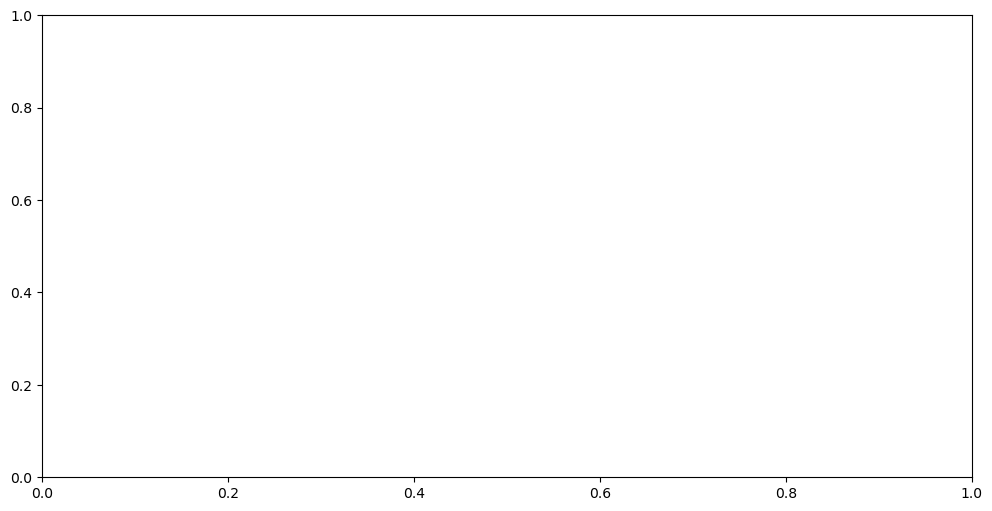

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Load the dataset
matches_path = "matches.csv"
matches_df = pd.read_csv(matches_path)

# Data preparation
matches_df["date"] = pd.to_datetime(matches_df['date'])

# Reshape and calculate team metrics
team_performance = matches_df.melt(
    id_vars=["id", "season", "date", "winner", "result", "result_margin", "target_runs"],
    value_vars=["team1", "team2"],
    var_name="home_or_away",
    value_name="team"
)

team_performance["is_winner"] = (team_performance["team"] == team_performance["winner"]).astype(int)
team_performance["runs_scored"] = team_performance["target_runs"]
team_performance["runs_conceded"] = team_performance.groupby("id")["target_runs"].transform("sum") - team_performance["target_runs"]

# Aggregate data for each team
team_performance_agg = team_performance.groupby(["team", "date"]).agg({
    "is_winner": "sum",
    "runs_scored": "sum",
    "runs_conceded": "sum"
}).sort_values("date").reset_index()

team_performance_agg["net_run_rate"] = team_performance_agg["runs_scored"] - team_performance_agg["runs_conceded"]

# Select a team
team_name = "Kolkata Knight Riders"
team_data = team_performance_agg[team_performance_agg["team"] == team_name]

# Sort and set the date index
team_data = team_data.sort_values("date")
team_data.set_index("date", inplace=True)

# Set frequency to daily (if data is daily)
team_data.index = team_data.index.to_period('D')  # Use 'D' for daily frequency

# Select the column to predict (runs scored)
time_series = team_data['runs_scored']

# Stationarity Check (ADF Test)
adf_result = adfuller(time_series)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
if adf_result[1] > 0.05:
    print("The series is not stationary. Differencing is required.")

# Differencing if series is non-stationary
if adf_result[1] > 0.05:
    time_series_diff = time_series.diff().dropna()
else:
    time_series_diff = time_series

# Train-test split
train_size = int(len(time_series_diff) * 0.8)
train, test = time_series_diff[:train_size], time_series_diff[train_size:]

# ARIMA model
model = ARIMA(train, order=(1, 1, 1))
fitted_model = model.fit()

# Forecasting
forecast = fitted_model.forecast(steps=len(test))

# Set the forecast index to match the test set's index
forecast_index = test.index
forecast = pd.Series(forecast, index=forecast_index)

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(time_series_diff, label="Actual data", color="blue")
plt.plot(forecast, label="Forecasted data", color="red", linestyle="--")
plt.axvline(x=test.index[0], color="gray", linestyle="--", label="Train-Test split")
plt.title(f"{team_name} - Runs Scored Forecast")
plt.xlabel("Date")
plt.ylabel("Runs Scored")
plt.legend()
plt.grid()
plt.show()

# Calculate error metrics
actual_runs = test.values
forecast_runs = forecast.values

mae = np.mean(np.abs(actual_runs - forecast_runs))
print(f"Mean Absolute Error (MAE): {mae}")

rmse = np.sqrt(np.mean((actual_runs - forecast_runs) ** 2))
print(f"Root Mean Squared Error (RMSE): {rmse}")


In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import numpy as np

In [5]:
# Load the dataset
matches_path = "matches.csv"
matches_df = pd.read_csv(matches_path)

In [7]:

# Data preparation
matches_df["date"] = pd.to_datetime(matches_df['date'])

In [9]:
# Reshape and calculate team metrics
team_performance = matches_df.melt(
    id_vars=["id", "season", "date", "winner", "result", "result_margin", "target_runs"],
    value_vars=["team1", "team2"],
    var_name="home_or_away",
    value_name="team"
)

team_performance["is_winner"] = (team_performance["team"] == team_performance["winner"]).astype(int)
team_performance["runs_scored"] = team_performance["target_runs"]
team_performance["runs_conceded"] = team_performance.groupby("id")["target_runs"].transform("sum") - team_performance["target_runs"]


In [11]:
# Aggregate data for each team
team_performance_agg = team_performance.groupby(["team", "date"]).agg({
    "is_winner": "sum",
    "runs_scored": "sum",
    "runs_conceded": "sum"
}).sort_values("date").reset_index()

team_performance_agg["net_run_rate"] = team_performance_agg["runs_scored"] - team_performance_agg["runs_conceded"]


In [13]:
# Select a team
team_name = "Kolkata Knight Riders"
team_data = team_performance_agg[team_performance_agg["team"] == team_name]

In [15]:
# Sort and set the date index
team_data = team_data.sort_values("date")
team_data.set_index("date", inplace=True)

In [17]:
# Set frequency to daily (if data is daily)
team_data.index = team_data.index.to_period('D')  # Use 'D' for daily frequency


In [19]:
# Select the column to predict (runs scored)
time_series = team_data['runs_scored']

In [21]:
# Stationarity Check (ADF Test)
adf_result = adfuller(time_series)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
if adf_result[1] > 0.05:
    print("The series is not stationary. Differencing is required.")

ADF Statistic: -7.214074913565803
p-value: 2.1963196715517275e-10


In [23]:
# Differencing if series is non-stationary
if adf_result[1] > 0.05:
    time_series_diff = time_series.diff().dropna()
else:
    time_series_diff = time_series

In [25]:

# Train-test split
train_size = int(len(time_series_diff) * 0.8)
train, test = time_series_diff[:train_size], time_series_diff[train_size:]

In [27]:
# ARIMA model
model = ARIMA(train, order=(1, 1, 1))
fitted_model = model.fit()

In [29]:
# Forecasting
forecast = fitted_model.forecast(steps=len(test))

In [31]:
# Set the forecast index to match the test set's index
forecast_index = test.index
forecast = pd.Series(forecast, index=forecast_index)


TypeError: float() argument must be a string or a real number, not 'Period'

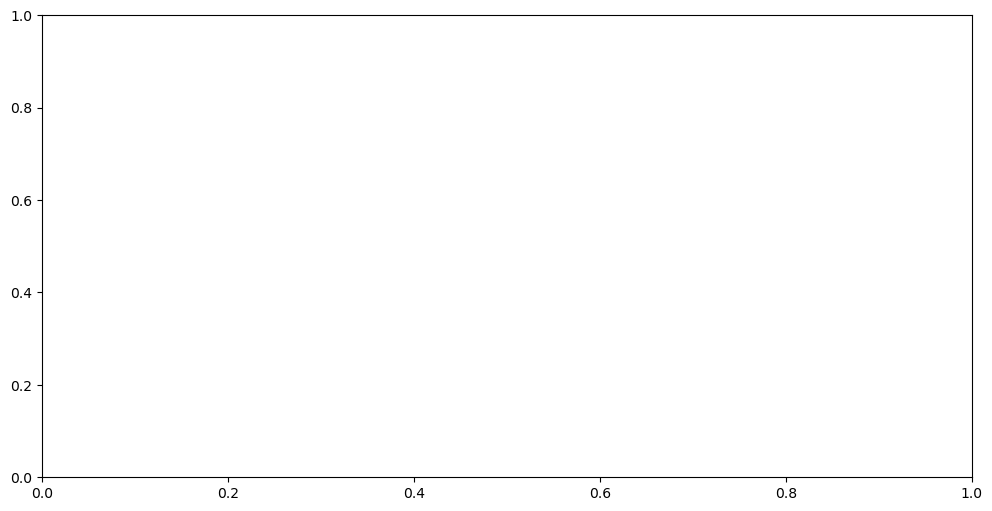

In [33]:
# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(time_series_diff, label="Actual data", color="blue")
plt.plot(forecast, label="Forecasted data", color="red", linestyle="--")
plt.axvline(x=test.index[0], color="gray", linestyle="--", label="Train-Test split")
plt.title(f"{team_name} - Runs Scored Forecast")
plt.xlabel("Date")
plt.ylabel("Runs Scored")
plt.legend()
plt.grid()
plt.show()

In [35]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Load the dataset
matches_path = "matches.csv"
matches_df = pd.read_csv(matches_path)

# Data preparation
print(matches_df.head(5))
matches_df["date"] = pd.to_datetime(matches_df['date'])
matches_df.head(5)

# Reshape and calculate team metrics
team_performance = matches_df.melt(
    id_vars=["id", "season", "date", "winner", "result", "result_margin", "target_runs"],
    value_vars=["team1", "team2"],
    var_name="home_or_away",
    value_name="team"
)

team_performance["is_winner"] = (team_performance["team"] == team_performance["winner"]).astype(int)
team_performance["runs_scored"] = team_performance["target_runs"]
team_performance["runs_conceded"] = team_performance.groupby("id")["target_runs"].transform("sum") - team_performance["target_runs"]

team_performance.head(5)

# Aggregated data for each team
team_performance_agg = team_performance.groupby(["team", "date"]).agg({
    "is_winner": "sum",
    "runs_scored": "sum",
    "runs_conceded": "sum"
}).sort_values("date").reset_index()

team_performance_agg["net_run_rate"] = team_performance_agg["runs_scored"] - team_performance_agg["runs_conceded"]

team_name = "Kolkata Knight Riders"
team_data = team_performance_agg[team_performance_agg["team"] == team_name]
team_data = team_data.sort_values("date")
team_data.set_index("date", inplace=True)

# Convert Period index back to datetime for plotting
team_data.index = team_data.index.to_timestamp()

# Select the column to predict (runs scored)
time_series = team_data['runs_scored']

# Stationarity Check (ADF Test)
adf_result = adfuller(time_series)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
if adf_result[1] > 0.05:
    print("The series is not stationary. Differencing is required.")

# Differencing if series is non-stationary
if adf_result[1] > 0.05:
    time_series_diff = time_series.diff().dropna()
else:
    time_series_diff = time_series

# Train-test split
train_size = int(len(time_series_diff) * 0.8)
train, test = time_series_diff[:train_size], time_series_diff[train_size:]

# ARIMA model
model = ARIMA(train, order=(1, 1, 1))
fitted_model = model.fit()

# Forecasting
forecast = fitted_model.forecast(steps=len(test))

# Set the forecast index to match the test set's index
forecast_index = test.index
forecast = pd.Series(forecast, index=forecast_index)

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(time_series_diff, label="Actual data", color="blue")
plt.plot(forecast, label="Forecasted data", color="red", linestyle="--")
plt.axvline(x=test.index[0], color="gray", linestyle="--", label="Train-Test split")
plt.title(f"{team_name} - Runs Scored Forecast")
plt.xlabel("Date")
plt.ylabel("Runs Scored")
plt.legend()
plt.grid()
plt.show()

# Calculate error metrics
actual_runs = test.values
forecast_runs = forecast.values

mae = np.mean(np.abs(actual_runs - forecast_runs))
print(f"Mean Absolute Error (MAE): {mae}")

rmse = np.sqrt(np.mean((actual_runs - forecast_runs) ** 2))
print(f"Root Mean Squared Error (RMSE): {rmse}")


       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkat

AttributeError: 'DatetimeIndex' object has no attribute 'to_timestamp'

       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkat

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\P

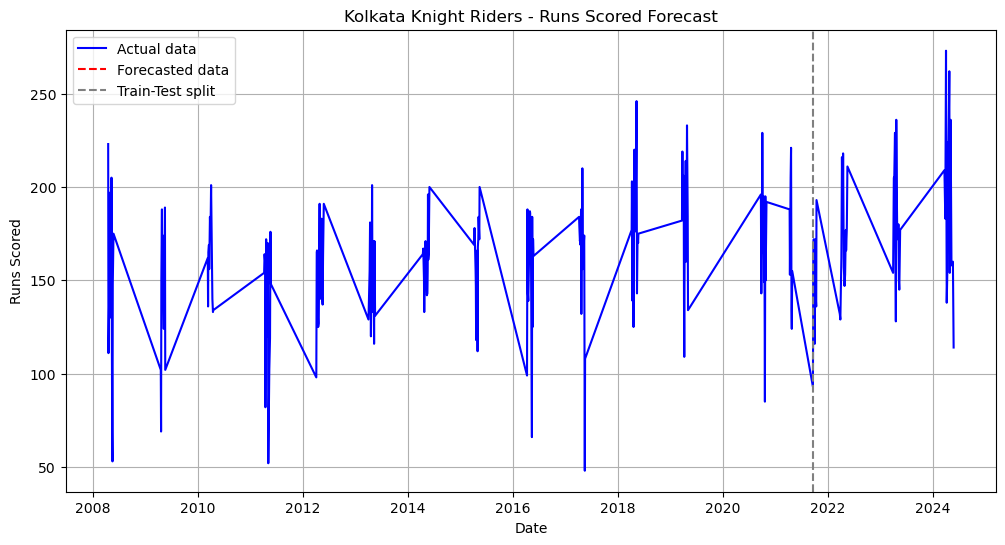

Mean Absolute Error (MAE): nan
Root Mean Squared Error (RMSE): nan


In [37]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Load the dataset
matches_path = "matches.csv"
matches_df = pd.read_csv(matches_path)

# Data preparation
print(matches_df.head(5))
matches_df["date"] = pd.to_datetime(matches_df['date'])
matches_df.head(5)

# Reshape and calculate team metrics
team_performance = matches_df.melt(
    id_vars=["id", "season", "date", "winner", "result", "result_margin", "target_runs"],
    value_vars=["team1", "team2"],
    var_name="home_or_away",
    value_name="team"
)

team_performance["is_winner"] = (team_performance["team"] == team_performance["winner"]).astype(int)
team_performance["runs_scored"] = team_performance["target_runs"]
team_performance["runs_conceded"] = team_performance.groupby("id")["target_runs"].transform("sum") - team_performance["target_runs"]

team_performance.head(5)

# Aggregated data for each team
team_performance_agg = team_performance.groupby(["team", "date"]).agg({
    "is_winner": "sum",
    "runs_scored": "sum",
    "runs_conceded": "sum"
}).sort_values("date").reset_index()

team_performance_agg["net_run_rate"] = team_performance_agg["runs_scored"] - team_performance_agg["runs_conceded"]

team_name = "Kolkata Knight Riders"
team_data = team_performance_agg[team_performance_agg["team"] == team_name]
team_data = team_data.sort_values("date")
team_data.set_index("date", inplace=True)

# Select the column to predict (runs scored)
time_series = team_data['runs_scored']

# Stationarity Check (ADF Test)
adf_result = adfuller(time_series)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
if adf_result[1] > 0.05:
    print("The series is not stationary. Differencing is required.")

# Differencing if series is non-stationary
if adf_result[1] > 0.05:
    time_series_diff = time_series.diff().dropna()
else:
    time_series_diff = time_series

# Train-test split
train_size = int(len(time_series_diff) * 0.8)
train, test = time_series_diff[:train_size], time_series_diff[train_size:]

# ARIMA model
model = ARIMA(train, order=(1, 1, 1))
fitted_model = model.fit()

# Forecasting
forecast = fitted_model.forecast(steps=len(test))

# Set the forecast index to match the test set's index
forecast_index = test.index
forecast = pd.Series(forecast, index=forecast_index)

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(time_series_diff, label="Actual data", color="blue")
plt.plot(forecast, label="Forecasted data", color="red", linestyle="--")
plt.axvline(x=test.index[0], color="gray", linestyle="--", label="Train-Test split")
plt.title(f"{team_name} - Runs Scored Forecast")
plt.xlabel("Date")
plt.ylabel("Runs Scored")
plt.legend()
plt.grid()
plt.show()

# Calculate error metrics
actual_runs = test.values
forecast_runs = forecast.values

mae = np.mean(np.abs(actual_runs - forecast_runs))
print(f"Mean Absolute Error (MAE): {mae}")

rmse = np.sqrt(np.mean((actual_runs - forecast_runs) ** 2))
print(f"Root Mean Squared Error (RMSE): {rmse}")


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\P

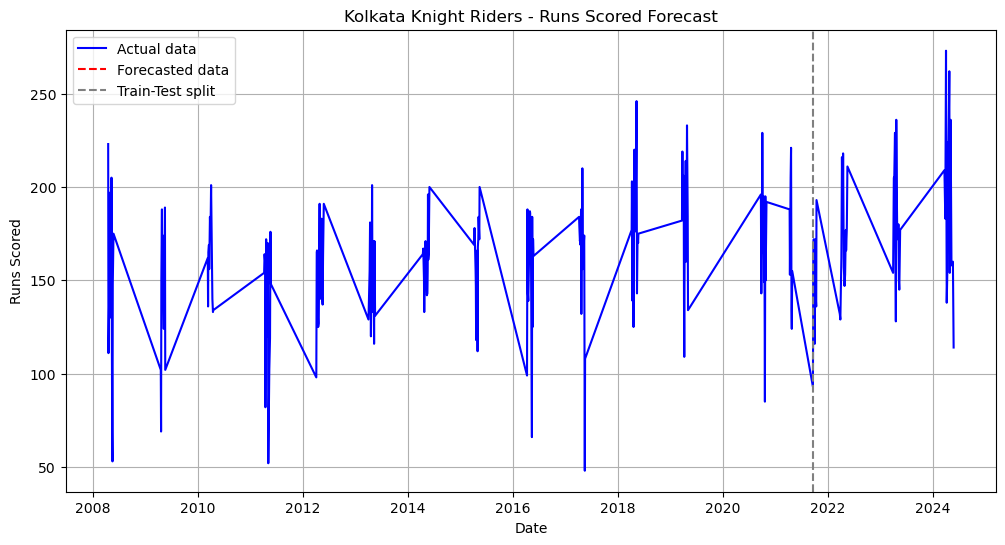

In [39]:
# Set the index frequency explicitly
team_data.index = pd.to_datetime(team_data.index)
team_data = team_data.asfreq('D')  # Set daily frequency for time series data

# ARIMA model
model = ARIMA(train, order=(1, 1, 1))
fitted_model = model.fit()

# Forecasting
forecast = fitted_model.forecast(steps=len(test))

# Set the forecast index to match the test set's index
forecast_index = test.index
forecast = pd.Series(forecast, index=forecast_index)

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(time_series_diff, label="Actual data", color="blue")
plt.plot(forecast, label="Forecasted data", color="red", linestyle="--")
plt.axvline(x=test.index[0], color="gray", linestyle="--", label="Train-Test split")
plt.title(f"{team_name} - Runs Scored Forecast")
plt.xlabel("Date")
plt.ylabel("Runs Scored")
plt.legend()
plt.grid()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\P

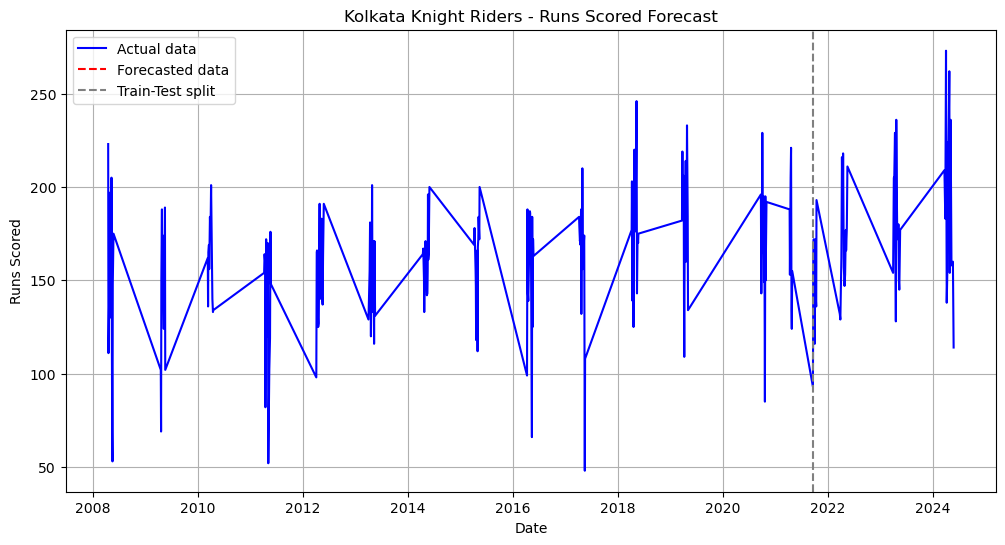

In [41]:
# Ensure datetime index and set frequency
team_data.index = pd.to_datetime(team_data.index)

# Set frequency to 'D' for daily data
team_data = team_data.asfreq('D')

# ARIMA model
model = ARIMA(train, order=(1, 1, 1))
fitted_model = model.fit()

# Forecasting
forecast = fitted_model.forecast(steps=len(test))

# Set the forecast index to match the test set's index
forecast_index = test.index
forecast = pd.Series(forecast, index=forecast_index)

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(time_series_diff, label="Actual data", color="blue")
plt.plot(forecast, label="Forecasted data", color="red", linestyle="--")
plt.axvline(x=test.index[0], color="gray", linestyle="--", label="Train-Test split")
plt.title(f"{team_name} - Runs Scored Forecast")
plt.xlabel("Date")
plt.ylabel("Runs Scored")
plt.legend()
plt.grid()
plt.show()


In [43]:
# Ensure the 'date' column is in datetime format
team_data["date"] = pd.to_datetime(team_data["date"])

# Set the 'date' column as the index
team_data.set_index("date", inplace=True)

# Set frequency explicitly. For example, daily data can use 'D', but adjust as needed.
team_data = team_data.asfreq('D', method='pad')  # 'pad' method fills missing values

# Now the ARIMA model should work without warnings about frequency
model = ARIMA(train, order=(1, 1, 1))
fitted_model = model.fit()

# Forecasting
forecast = fitted_model.forecast(steps=len(test))

# Align forecast with the test set
forecast = pd.Series(forecast, index=test.index)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(time_series_diff, label="Actual data", color="blue")
plt.plot(forecast, label="Forecasted data", color="red", linestyle="--")
plt.axvline(x=test.index[0], color="gray", linestyle="--", label="Train-Test split")
plt.title(f"{team_name} - Runs Scored Forecast")
plt.xlabel("Date")
plt.ylabel("Runs Scored")
plt.legend()
plt.grid()
plt.show()


KeyError: 'date'

In [45]:
print(team_data.columns)

Index(['team', 'is_winner', 'runs_scored', 'runs_conceded', 'net_run_rate'], dtype='object')


       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkat

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\P

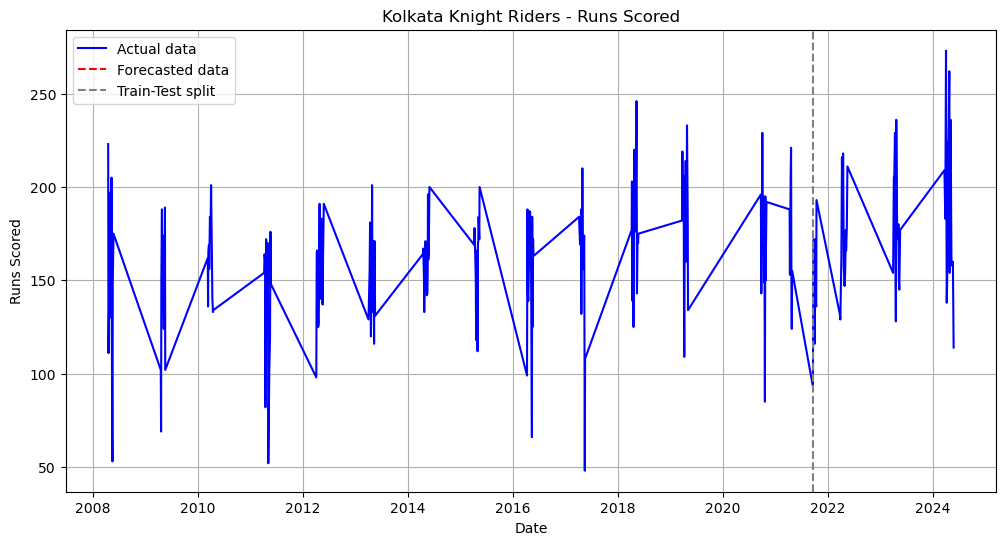

In [47]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Load the data
matches_path = "matches.csv"
matches_df = pd.read_csv(matches_path)

# Data preparation
print(matches_df.head(5))

# Ensure the 'date' column is in datetime format
matches_df["date"] = pd.to_datetime(matches_df['date'])

# Reshape and calculate team metrics
team_performance = matches_df.melt(
    id_vars=["id", "season", "date", "winner", "result", "result_margin", "target_runs"],
    value_vars=["team1", "team2"],
    var_name="home_or_away",
    value_name="team"
)

team_performance["is_winner"] = (team_performance["team"] == team_performance["winner"]).astype(int)
team_performance["runs_scored"] = team_performance["target_runs"]
team_performance["runs_conceded"] = team_performance.groupby("id")["target_runs"].transform("sum") - team_performance["target_runs"]

team_performance.head(5)

# Aggregated data for each team
team_performance_agg = team_performance.groupby(["team", "date"]).agg({
    "is_winner": "sum",
    "runs_scored": "sum",
    "runs_conceded": "sum"
}).sort_values("date").reset_index()  # Ensure 'date' is included in the reset index

# Calculate the net run rate
team_performance_agg["net_run_rate"] = team_performance_agg["runs_scored"] - team_performance_agg["runs_conceded"]

# Filter data for the selected team
team_name = "Kolkata Knight Riders"
team_data = team_performance_agg[team_performance_agg["team"] == team_name]
team_data = team_data.sort_values("date")

# Set 'date' as the index
team_data.set_index("date", inplace=True)

# Select the column to predict (runs scored)
time_series = team_data['runs_scored']

# Stationarity Check (ADF Test)
adf_result = adfuller(time_series)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

if adf_result[1] > 0.05:
    print("The series is not stationary. Differencing is required.")

# Perform differencing if necessary
if adf_result[1] > 0.05:
    time_series_diff = time_series.diff().dropna()
else:
    time_series_diff = time_series

# Split data into train and test sets
train_size = int(len(time_series_diff) * 0.8)
train, test = time_series_diff[:train_size], time_series_diff[train_size:]

# Build the ARIMA model
model = ARIMA(train, order=(1, 1, 1))
fitted_model = model.fit()

# Forecasting
forecast = fitted_model.forecast(steps=len(test))

# Align the forecast with the test set index
forecast_index = test.index
forecast = pd.Series(forecast, index=forecast_index)

# Evaluate the model's performance
actual_runs = test.values
forecast_runs = forecast.values

mae = np.mean(np.abs(actual_runs - forecast_runs))
print(f"Mean Absolute Error (MAE): {mae}")
rmse = np.sqrt(np.mean((actual_runs - forecast_runs) ** 2))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(time_series_diff, label="Actual data", color="blue")
plt.plot(forecast, label="Forecasted data", color="red", linestyle="--")
plt.axvline(x=test.index[0], color="gray", linestyle="--", label="Train-Test split")
plt.title(f"{team_name} - Runs Scored")
plt.xlabel("Date")
plt.ylabel("Runs Scored")
plt.legend()
plt.grid()
plt.show()
